In [1]:
# chuẩn bị môi trường
from IPython.display import display
import pandas as pd # Gọi thư viện pandas
import numpy as np # Gọi thư viện numpy

# Đọc dữ liệu từ bảng
data = pd.read_csv('P4AI_BT1.csv')
print('Setup complete.')

Setup complete.


In [2]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,NaN,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,NaN,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,NaN,5.0,1.9,Virginica
147,NaN,NaN,5.2,2.0,Virginica
148,NaN,3.4,NaN,2.3,Virginica


In [3]:
# điền các giá trị còn thiếu bằng phương pháp trung bình
# lấy giá trị trung bình đến 1 chữ số thập phân
arg_slength = round(data['sepal.length'].mean() * 10) /10 
arg_swidth = round(data['sepal.width'].mean() * 10) /10 
arg_plength = round(data['petal.length'].mean() * 10) /10 
arg_pwidth = round(data['petal.width'].mean() * 10) /10 

# thay giá trị 'NaN' bằng giá trị tương ứng
data['sepal.length'].fillna(arg_slength,inplace=True)
data['sepal.width'].fillna(arg_swidth,inplace=True)
data['petal.length'].fillna(arg_plength,inplace=True)
data['petal.width'].fillna(arg_pwidth,inplace=True)

data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,3.7,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,1.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,3.1,5.0,1.9,Virginica
147,5.9,3.1,5.2,2.0,Virginica
148,5.9,3.4,3.7,2.3,Virginica


In [4]:
# Loại bỏ các dòng bị thiếu nhãn khỏi tập dữ liệu
train_data = data.dropna(subset=['variety'])

# Dữ liệu bị thiếu nhãn
test_data = data[data['variety'].isnull()]     
print(train_data.shape,test_data.shape)


(135, 5) (15, 5)


<Axes: xlabel='variety'>

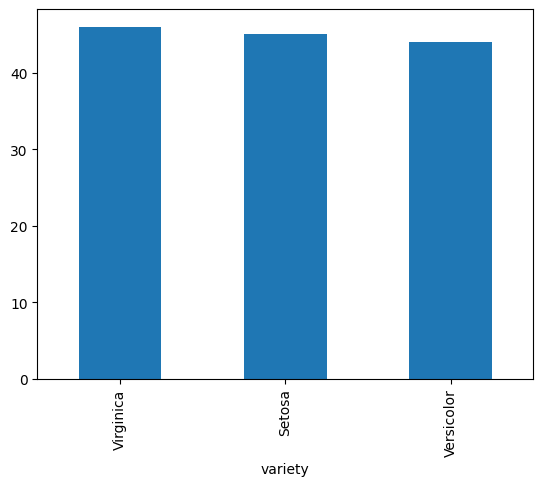

In [5]:
# visualize data
train_data["variety"].value_counts().plot(kind="bar")

In [6]:
train_data["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [7]:
name_to_id = {
    "Setosa": 0,
    "Versicolor": 1,
    "Virginica": 2
}

id_to_name = {
    0: "Setosa",
    1: "Versicolor",
    2: "Virginica"
}

# preprocessing variety
train_data.loc[:, "variety"] = train_data["variety"].map(name_to_id)
train_data["variety"] = train_data["variety"].astype('int')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11344\1492955230.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["variety"] = train_data["variety"].astype('int')


In [8]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_data.iloc[:, :-1], train_data.iloc[:, -1], test_size=0.2, random_state=42
)
print(len(X_train),X_test.shape)

108 (27, 4)


Thuật toán KNN

In [9]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# Gọi thư viện

In [10]:
# k = 3, khoảng cách euclidean
clf = neighbors.KNeighborsClassifier(n_neighbors = 3, weights = 'distance', metric='euclidean')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("k = 3 , distance: euclidean")
print("KNN accuracy: ", accuracy_score(y_test, y_pred))
print("KNN f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("KNN confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

k = 3 , distance: euclidean
KNN accuracy:  0.9629629629629629
KNN f1 score:  0.9629629629629629
KNN confusion matrix: 
[[12  0  0]
 [ 0  7  0]
 [ 0  1  7]]


In [11]:
# k = 5, khoảng cách euclidean
clf = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance', metric='euclidean')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("k = 5 , distance: euclidean")
print("KNN accuracy: ", accuracy_score(y_test, y_pred))
print("KNN f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("KNN confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

k = 5 , distance: euclidean
KNN accuracy:  0.8888888888888888
KNN f1 score:  0.8858722976370035
KNN confusion matrix: 
[[12  0  0]
 [ 0  7  0]
 [ 0  3  5]]


In [12]:
# k = 3, khoảng cách cosine
clf = neighbors.KNeighborsClassifier(n_neighbors = 3, weights = 'distance', metric='cosine')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("k = 3 , distance: cosine")
print("KNN accuracy: ", accuracy_score(y_test, y_pred))
print("KNN f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("KNN confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

k = 3 , distance: cosine
KNN accuracy:  0.9259259259259259
KNN f1 score:  0.9252645502645502
KNN confusion matrix: 
[[12  0  0]
 [ 0  7  0]
 [ 0  2  6]]


In [13]:
# k = 5, khoảng cách cosine
clf = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance', metric='cosine')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("k = 5 , distance: cosine")
print("KNN accuracy: ", accuracy_score(y_test, y_pred))
print("KNN f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("KNN confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

k = 5 , distance: cosine
KNN accuracy:  0.9259259259259259
KNN f1 score:  0.9252645502645502
KNN confusion matrix: 
[[12  0  0]
 [ 0  7  0]
 [ 0  2  6]]


Thuật toán Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)
# evaluate
print("LR classification accuracy", accuracy_score(y_test, y_pred))
# f1 score
print("LR f1 score", f1_score(y_test, y_pred, average="macro"))
# matrix confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)


LR classification accuracy 0.8888888888888888
LR f1 score 0.8642533936651584
[[12  0  0]
 [ 0  7  0]
 [ 0  3  5]]


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Thuật toán SVM

In [15]:

from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("kernel: linear")
print("SVM accuracy: ", accuracy_score(y_test, y_pred))
print("SVM f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("SVM confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

kernel: linear
SVM accuracy:  0.8518518518518519
SVM f1 score:  0.8436213991769547
SVM confusion matrix: 
[[12  0  0]
 [ 0  7  0]
 [ 0  4  4]]


In [16]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("kernel: rbf")
print("SVM accuracy: ", accuracy_score(y_test, y_pred))
print("SVM f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("SVM confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

kernel: rbf
SVM accuracy:  0.8518518518518519
SVM f1 score:  0.8546870914020672
SVM confusion matrix: 
[[11  1  0]
 [ 0  7  0]
 [ 0  3  5]]


Thuật toán Random forests

In [17]:
from sklearn.ensemble import RandomForestClassifier

# create classifier
clf = RandomForestClassifier(n_estimators=10, random_state=0)
# train model
clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)

# evaluate
print("RF accuracy: ", accuracy_score(y_test, y_pred))
print("RF f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("RF confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

RF accuracy:  1.0
RF f1 score:  1.0
RF confusion matrix: 
[[12  0  0]
 [ 0  7  0]
 [ 0  0  8]]


Dự đoán:

In [18]:
# dữ liệu bị thiếu
test_data

,sepal.length,sepal.width,petal.length,petal.width,variety
9,4.9,3.1,1.5,0.1,NaN
11,4.8,3.1,1.6,0.2,NaN
17,5.1,3.5,1.4,0.3,NaN
27,5.2,3.5,1.5,0.2,NaN
33,5.5,4.2,1.4,0.2,NaN
50,7.0,3.2,4.7,1.4,NaN
68,6.2,2.2,4.5,1.5,NaN
70,5.9,3.2,4.8,1.8,NaN
71,6.1,2.8,4.0,1.3,NaN
81,5.5,2.4,3.7,1.0,NaN


Dựa theo 2 môi hình có tỉ lệ chính xác cao nhất

In [19]:
# sử dụng thuật toán Random Forest
clf = RandomForestClassifier(n_estimators=10, random_state=0)
# train model
clf.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
# predict
predict = clf.predict(test_data.iloc[:, :-1])
predict

array([0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2])

In [20]:
# sử dụng thuật toán KNN k = 3, khoảng cách euclidean
clf = neighbors.KNeighborsClassifier(n_neighbors = 3, weights = 'distance', metric='euclidean')
# train model
clf.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
# predict
predict1 = clf.predict(test_data.iloc[:, :-1])
predict1 

array([0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2])

In [21]:
test_data['variety'] = predict1
test_data.loc[:, "variety"] = test_data["variety"].map(id_to_name)
test_data

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11344\4162697443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['variety'] = predict1


,sepal.length,sepal.width,petal.length,petal.width,variety
9,4.9,3.1,1.5,0.1,Setosa
11,4.8,3.1,1.6,0.2,Setosa
17,5.1,3.5,1.4,0.3,Setosa
27,5.2,3.5,1.5,0.2,Setosa
33,5.5,4.2,1.4,0.2,Setosa
50,7.0,3.2,4.7,1.4,Versicolor
68,6.2,2.2,4.5,1.5,Versicolor
70,5.9,3.2,4.8,1.8,Virginica
71,6.1,2.8,4.0,1.3,Versicolor
81,5.5,2.4,3.7,1.0,Versicolor
